### Import necessary libraries for Data Analysis

In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load the vehicle insurance claim dataset

In [ ]:
df=pd.read_csv("/content/fraud_oracle.csv")
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [ ]:
# verfiy if there is any missing value in each feature
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [ ]:
# show all of the columns of the dataset
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
# check the unique values for each column
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

## Exploratory Data Analysis (EDA)

In [ ]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

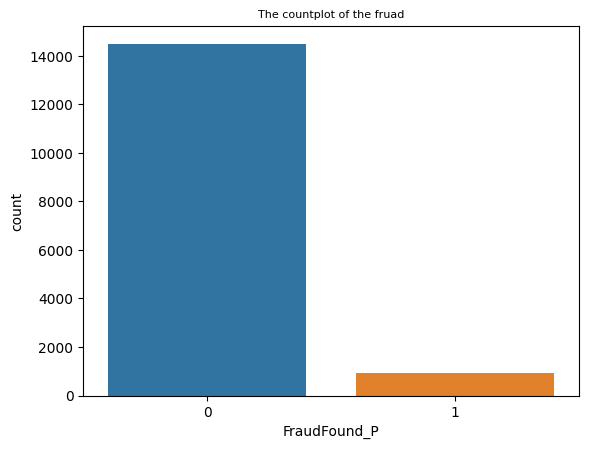

In [ ]:
#plt.figure(figsize=(8, 5), dpi=140)
plt.title('The countplot of the fruad', fontsize=8)
fruad_plot = sns.countplot(data = df, x ='FraudFound_P')
plt.show()

In [ ]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [ ]:
df['FraudFound_P'].skew()

3.7111642388878874

In [ ]:
fraud_corrected= np.log(df['FraudFound_P']+1)
print(df['FraudFound_P'].skew())
print(fraud_corrected.skew())

3.7111642388878874
3.7111642388878865


In [ ]:
fraud_corrected.value_counts()

0.000000    14497
0.693147      923
Name: FraudFound_P, dtype: int64

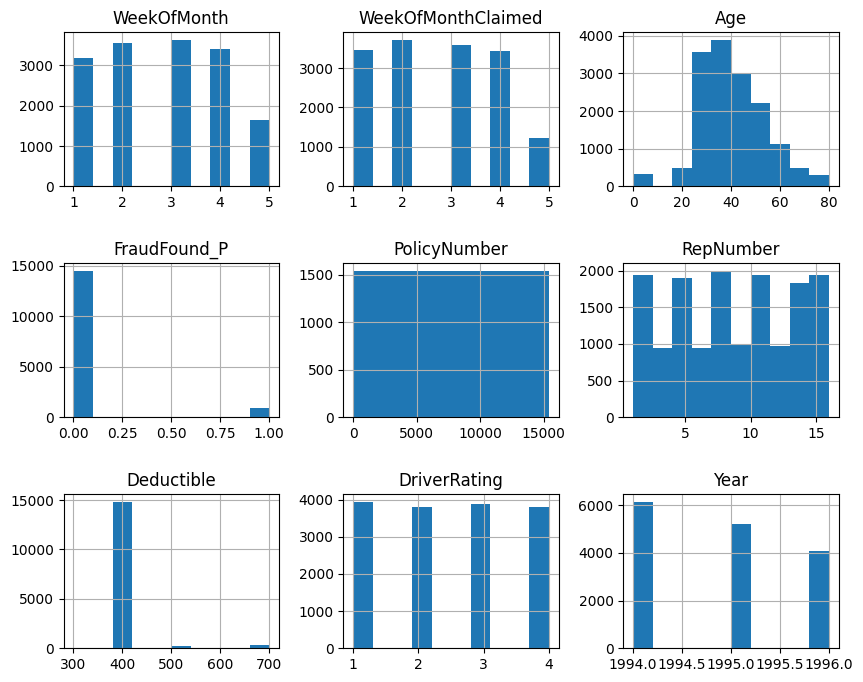

In [ ]:
# display the histogram of numerical features
df.hist(figsize = (10,8))
plt.subplots_adjust(hspace = 0.5)

<ipython-input-16-11928c89b839>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


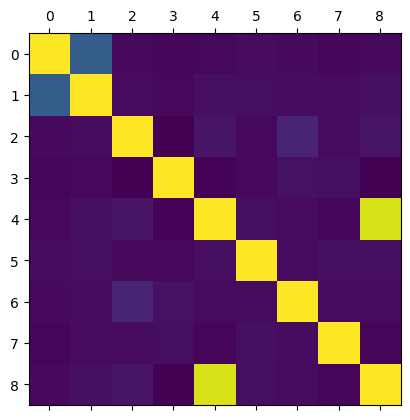

In [ ]:
plt.matshow(df.corr())
plt.show()

In [ ]:
corr = df.corr()
corr.style

<ipython-input-17-80ba2d588999>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.011861,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,-0.005761,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,-0.029741,0.025944,-0.007063,0.069420,0.001668,0.025197
FraudFound_P,-0.011861,-0.005761,-0.029741,1.000000,-0.020345,-0.007551,0.017348,0.007266,-0.024760
PolicyNumber,-0.007797,0.011665,0.025944,-0.020345,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.007063,-0.007551,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069420,0.017348,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,0.007266,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,-0.024760,0.936513,0.009338,-0.001170,-0.013890,1.000000


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-18-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.011861,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,-0.005761,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,-0.029741,0.025944,-0.007063,0.069420,0.001668,0.025197
FraudFound_P,-0.011861,-0.005761,-0.029741,1.000000,-0.020345,-0.007551,0.017348,0.007266,-0.024760
PolicyNumber,-0.007797,0.011665,0.025944,-0.020345,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.007063,-0.007551,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069420,0.017348,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,0.007266,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,-0.024760,0.936513,0.009338,-0.001170,-0.013890,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f360d156470>,
 'caps': [<matplotlib.lines.Line2D at 0x7f360d156d70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f360d157a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f360d154dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f360d165bd0>],
 'means': []}

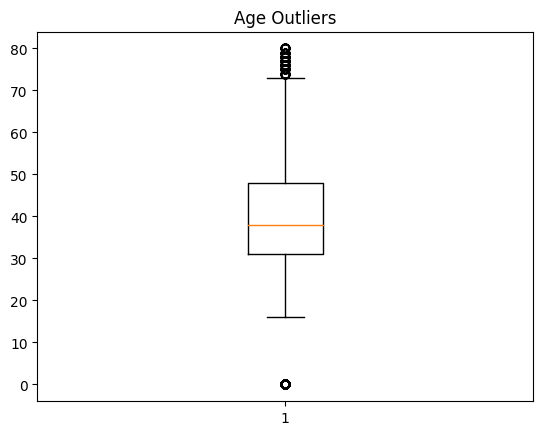

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Age Outliers')
ax1.boxplot(df['Age'])

In [ ]:
 df.drop(df[df.Age == 0].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f360d0026b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f360d002bf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f360d002410>],
 'medians': [<matplotlib.lines.Line2D at 0x7f360d003130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f360d0033d0>],
 'means': []}

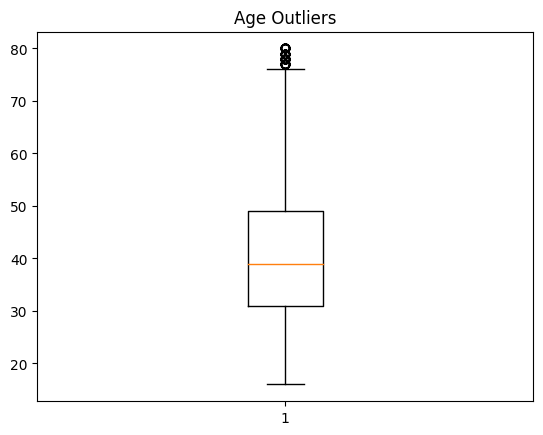

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Age Outliers')
ax1.boxplot(df['Age'])

<ipython-input-22-f14168720e93>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = "Spectral") #"crest" "Spectral" vmin = -1, vmax = 1, , cmap = "Spectral"


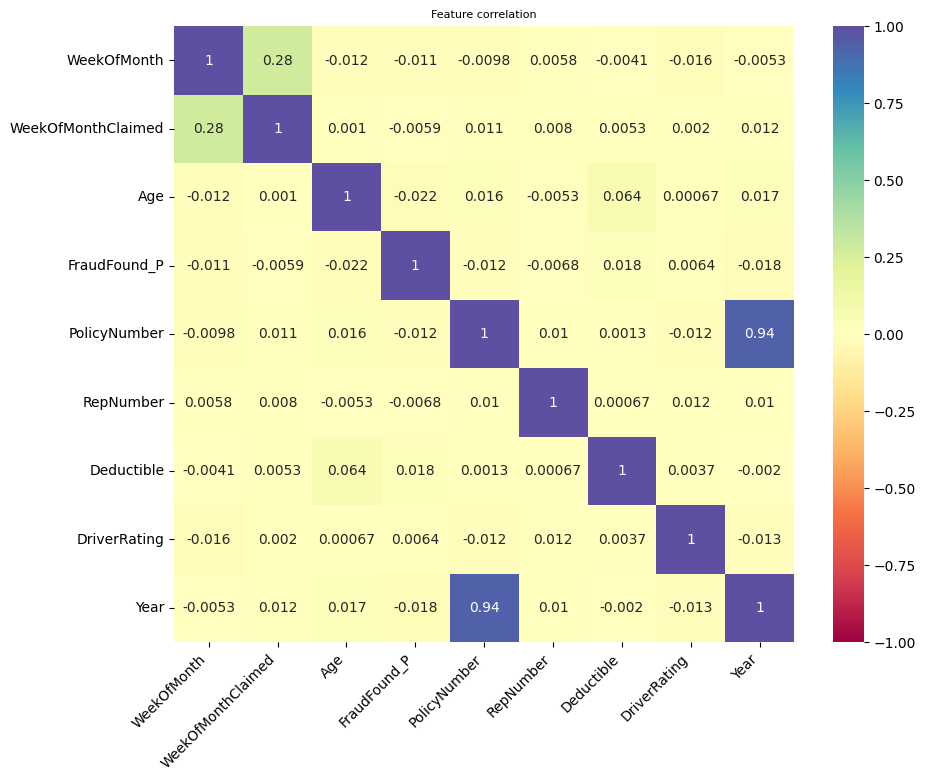

In [ ]:
import seaborn as sns
# Correlation between each of features
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = "Spectral") #"crest" "Spectral" vmin = -1, vmax = 1, , cmap = "Spectral"
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.title("Feature correlation", fontsize= 8)
plt.show()

## Feature Encoding: Change Categorical data to numerical data

In [ ]:
# Create one hot encoder for changine categorical data to numerical
def one_hot_encoder(data,col):
  dm=pd.get_dummies(pd.Series(data[col]), dtype=int)
  data.drop(col, axis=1, inplace=True)
  return pd.concat([data, dm], axis=1)

# Encoder with sklearn
from sklearn.preprocessing import LabelEncoder
def label_enc(data,col):
  le = LabelEncoder()
  label = le.fit_transform(data[col])
  data.drop(col, axis=1, inplace=True)
  data[col] = label
  return data

In [ ]:
categorical_cols=['Month', 'DayOfWeek', 'Make', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Accident', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'AgentType', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy', 'AccidentArea', 'DayOfWeekClaimed',	'MonthClaimed',	'Sex',	'MaritalStatus',	'Age'	,'Fault',	'PolicyType',	'VehicleCategory','Days_Policy_Claim',	'WitnessPresent',	'NumberOfSuppliments']

In [ ]:
data=df.copy(deep=True)
data.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
for i in categorical_cols:
  label_enc(data,i)
data.head(10)

,WeekOfMonth,WeekOfMonthClaimed,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,Month,DayOfWeek,...,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,Days_Policy_Claim,WitnessPresent,NumberOfSuppliments
0,5,1,0,1,12,300,1,1994,2,6,...,4,0,2,5,0,5,1,2,0,3
1,3,4,0,2,15,400,4,1994,4,6,...,4,1,2,18,0,4,1,2,0,3
2,5,2,0,3,7,400,3,1994,10,0,...,9,1,1,31,0,4,1,2,0,3
3,2,1,0,4,4,400,2,1994,6,2,...,5,1,1,49,1,2,1,2,0,2
4,5,2,0,5,3,400,1,1994,4,1,...,3,0,2,11,1,4,1,2,0,3
5,4,1,0,6,12,400,3,1994,10,0,...,9,1,2,4,1,4,1,2,0,1
6,1,3,0,7,14,400,1,1994,3,2,...,3,1,1,20,1,4,1,2,0,0
8,4,5,0,9,7,400,4,1994,2,2,...,2,1,2,14,0,4,1,2,1,1
9,3,3,0,10,7,400,1,1994,0,5,...,0,1,1,26,0,6,2,2,0,1
10,2,3,0,11,7,400,3,1994,7,3,...,7,1,2,55,0,0,0,2,0,3


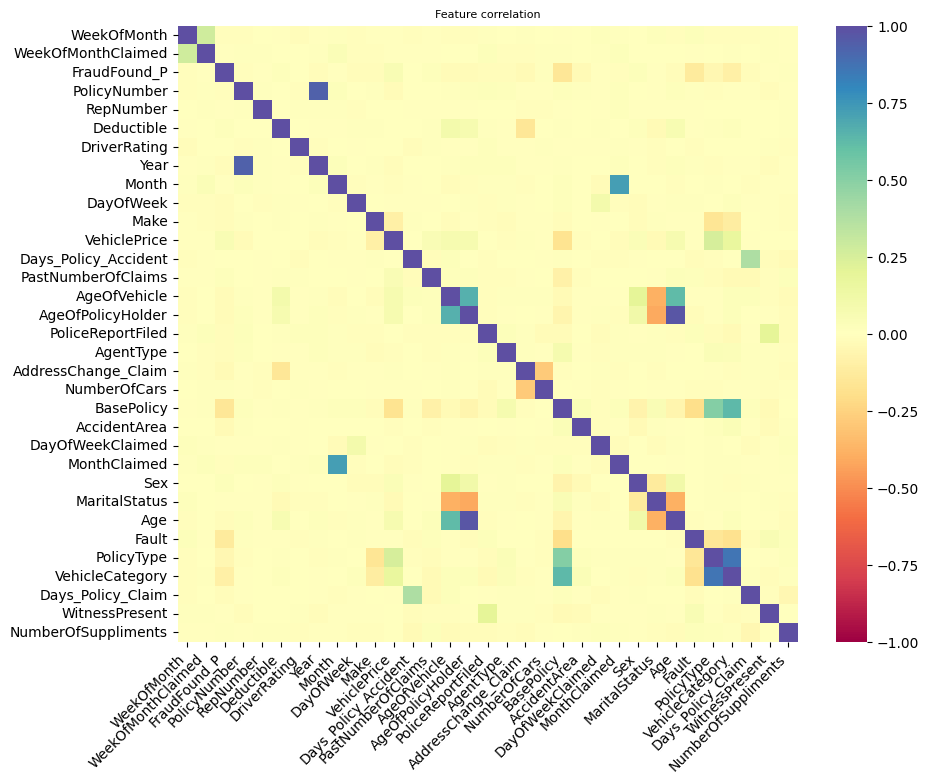

In [ ]:
import seaborn as sns
# Correlation between each of features
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, cmap = "Spectral") #"crest" "Spectral" vmin = -1, vmax = 1, , cmap = "Spectral"
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.title("Feature correlation", fontsize= 8)
plt.show()

Month, DayofWeekm Make,AccidentArea, Sex, MaritalStatus, Fault, PolicyType, VehicleCategory, VehiclePrice, Days_Policy_Accident, Days_Policy_Accident, PastNumberOfClaims, AgeOfVehicle, AgeOfPolicyHolder, PoliceReportFiled, AgentType, AddressChange_Claim, NumberOfCars, BasePolicy


### Each column vs target (for Data Cleaning)

[Text(0, 0, '60'),
 Text(0, 0, '53'),
 Text(0, 0, '57'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '65'),
 Text(0, 0, '71'),
 Text(0, 0, '49'),
 Text(0, 0, '62'),
 Text(0, 0, '65'),
 Text(0, 0, '54'),
 Text(0, 0, '45'),
 Text(0, 0, '58'),
 Text(0, 0, '56'),
 Text(0, 0, '46'),
 Text(0, 0, '51')]

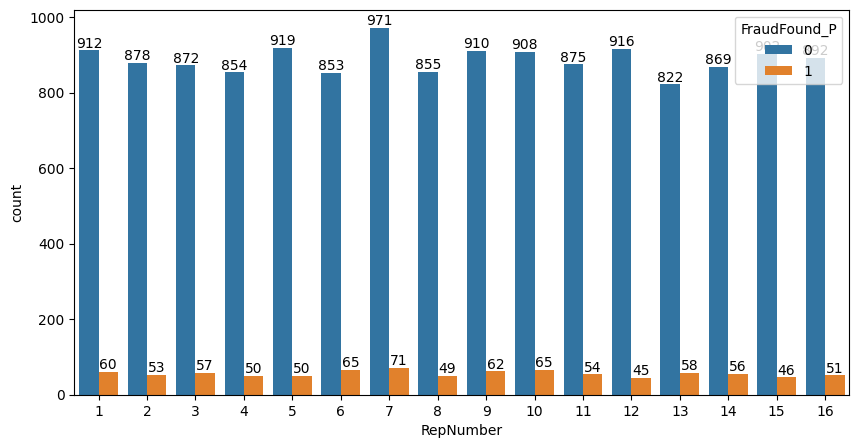

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["RepNumber"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '224'), Text(0, 0, '208'), Text(0, 0, '235'), Text(0, 0, '225')]

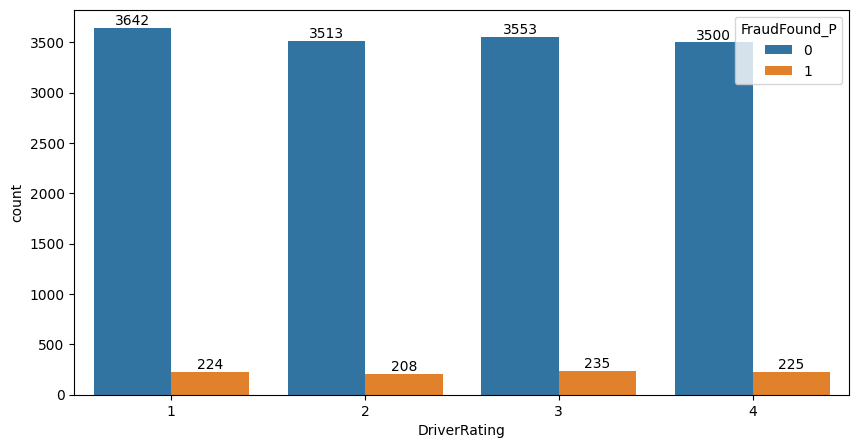

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["DriverRating"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '213'),
 Text(0, 0, '201'),
 Text(0, 0, '214'),
 Text(0, 0, '200'),
 Text(0, 0, '64')]

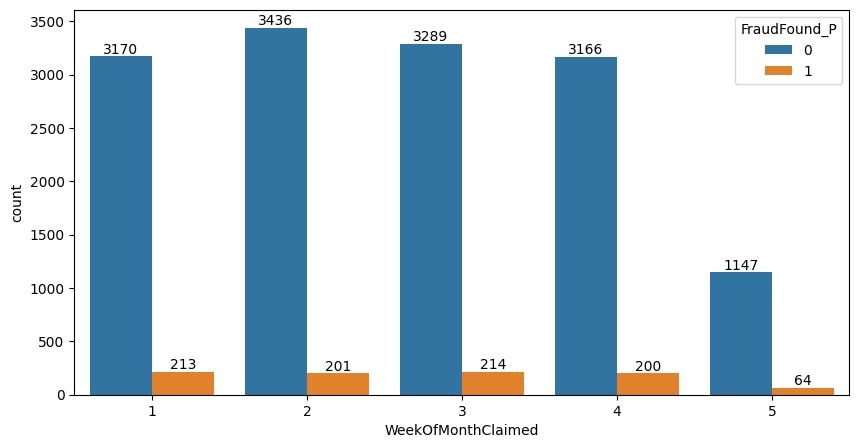

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["WeekOfMonthClaimed"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '187'),
 Text(0, 0, '223'),
 Text(0, 0, '212'),
 Text(0, 0, '181'),
 Text(0, 0, '89')]

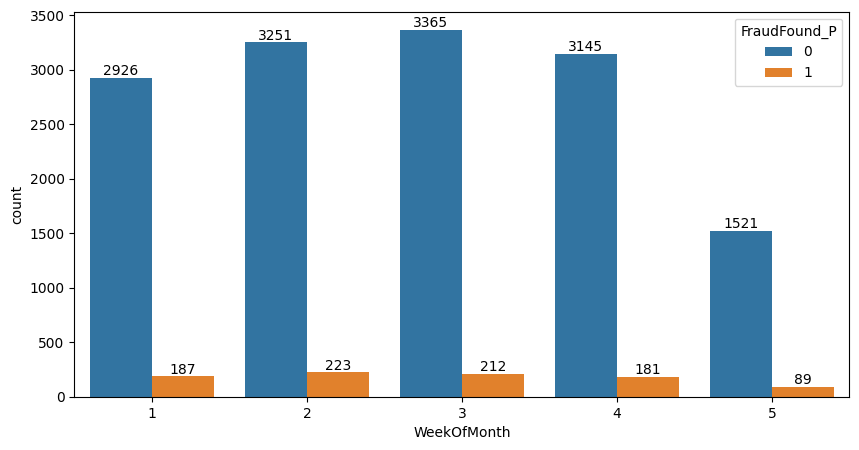

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["WeekOfMonth"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '247'), Text(0, 0, '639'), Text(0, 0, '3'), Text(0, 0, '3')]

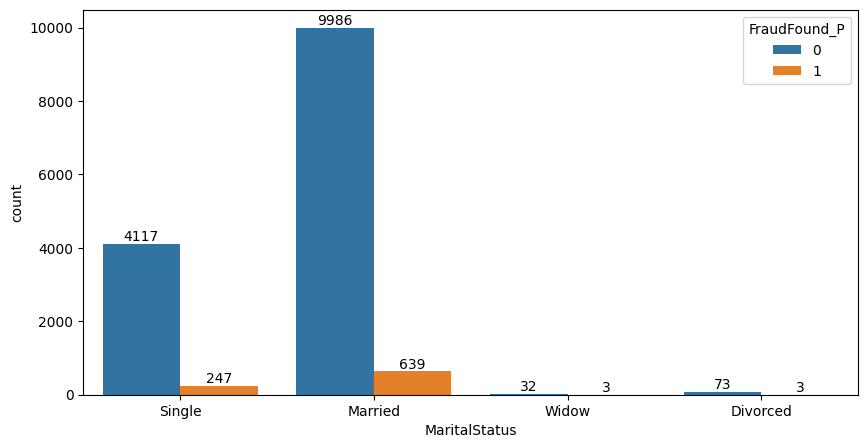

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["MaritalStatus"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '105'), Text(0, 0, '787')]

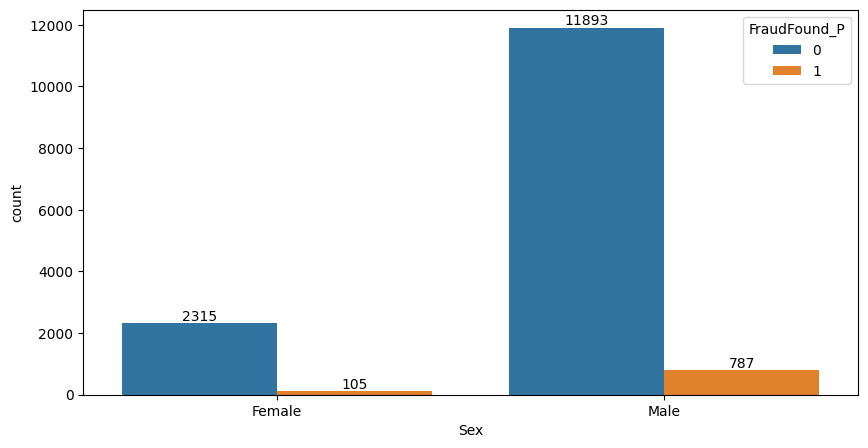

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["Sex"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '2'), Text(0, 0, '825'), Text(0, 0, '47'), Text(0, 0, '18')]

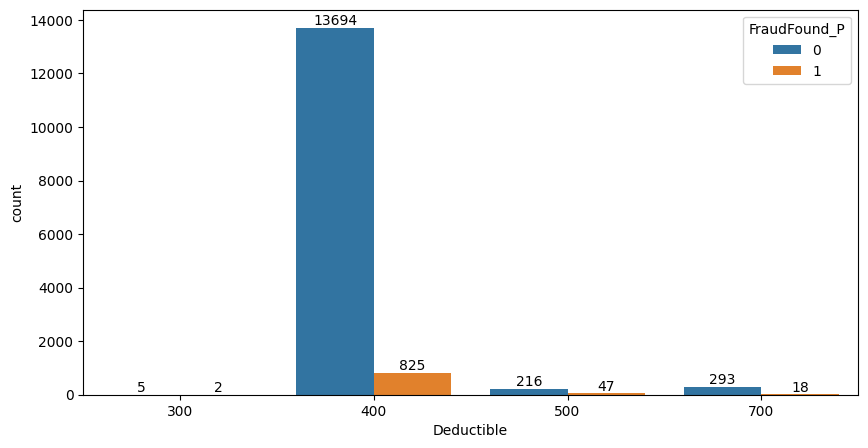

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["Deductible"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '8'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '12'),
 Text(0, 0, '3'),
 Text(0, 0, '8'),
 Text(0, 0, '6'),
 Text(0, 0, '32'),
 Text(0, 0, '32'),
 Text(0, 0, '38'),
 Text(0, 0, '31'),
 Text(0, 0, '37'),
 Text(0, 0, '35'),
 Text(0, 0, '46'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '51'),
 Text(0, 0, '24'),
 Text(0, 0, '22'),
 Text(0, 0, '22'),
 Text(0, 0, '28'),
 Text(0, 0, '31'),
 Text(0, 0, '31'),
 Text(0, 0, '14'),
 Text(0, 0, '24'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '27'),
 Text(0, 0, '8'),
 Text(0, 0, '15'),
 Text(0, 0, '9'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '9'),
 Text(0, 0, '16'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '4'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '5'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '10'),
 Text(0, 0, '7'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),

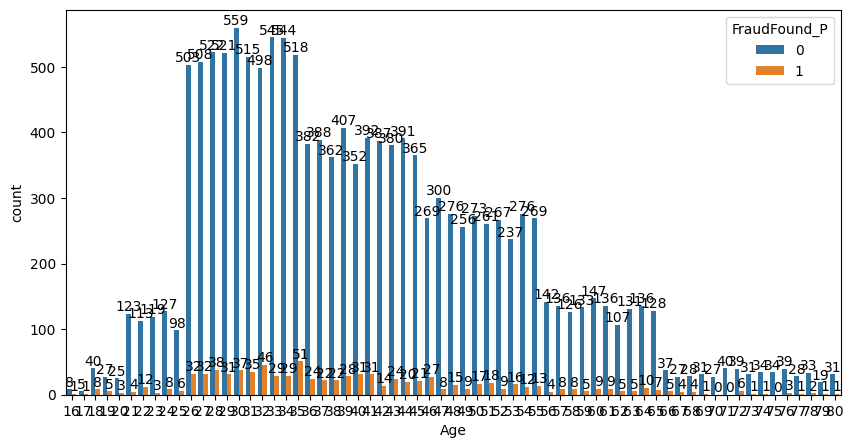

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["Age"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '319'), Text(0, 0, '217'), Text(0, 0, '290'), Text(0, 0, '66')]

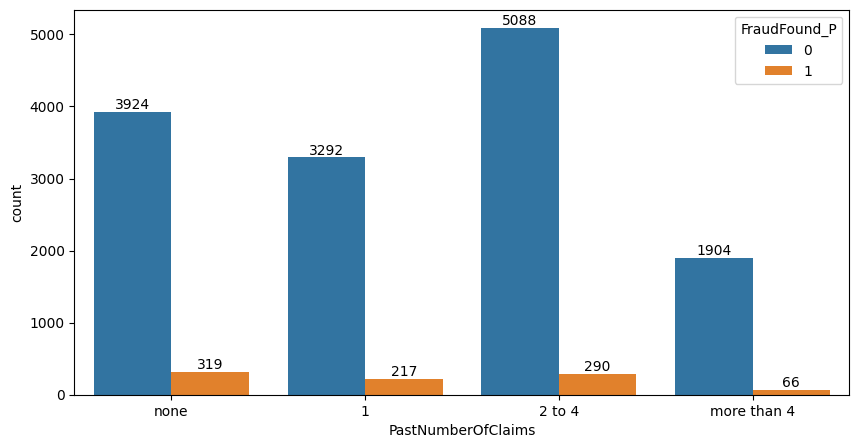

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["PastNumberOfClaims"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '59'),
 Text(0, 0, '84'),
 Text(0, 0, '70'),
 Text(0, 0, '78'),
 Text(0, 0, '77'),
 Text(0, 0, '74'),
 Text(0, 0, '96'),
 Text(0, 0, '83'),
 Text(0, 0, '58'),
 Text(0, 0, '91'),
 Text(0, 0, '76'),
 Text(0, 0, '46')]

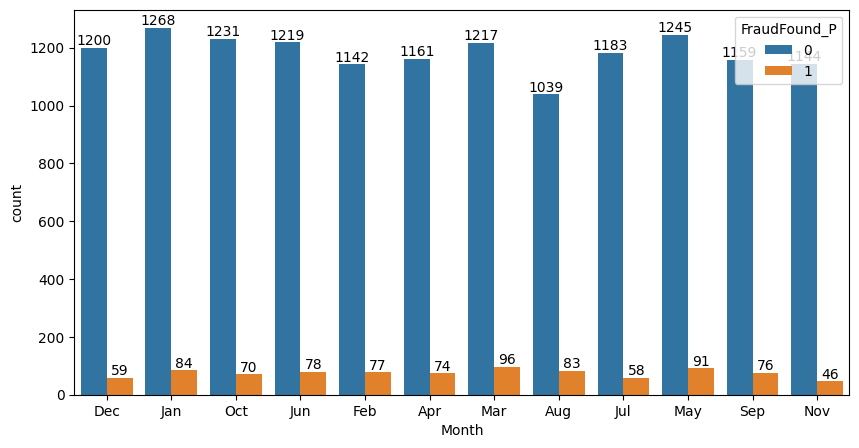

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["Month"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '13'),
 Text(0, 0, '228'),
 Text(0, 0, '325'),
 Text(0, 0, '206'),
 Text(0, 0, '95'),
 Text(0, 0, '21'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

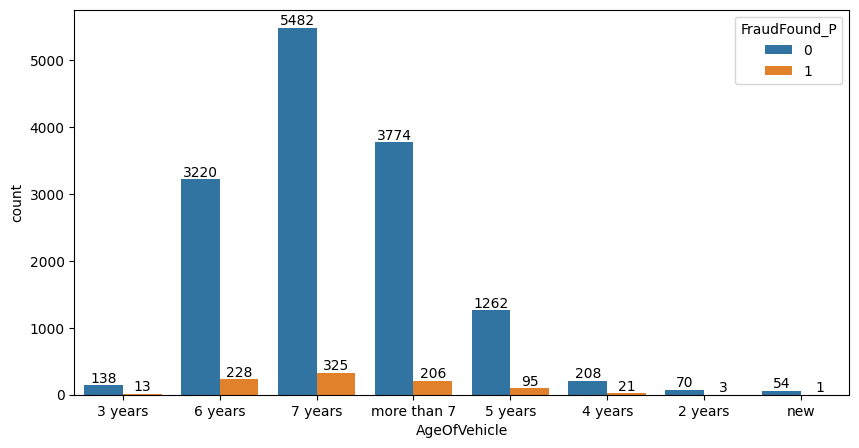

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["AgeOfVehicle"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '761'), Text(0, 0, '131')]

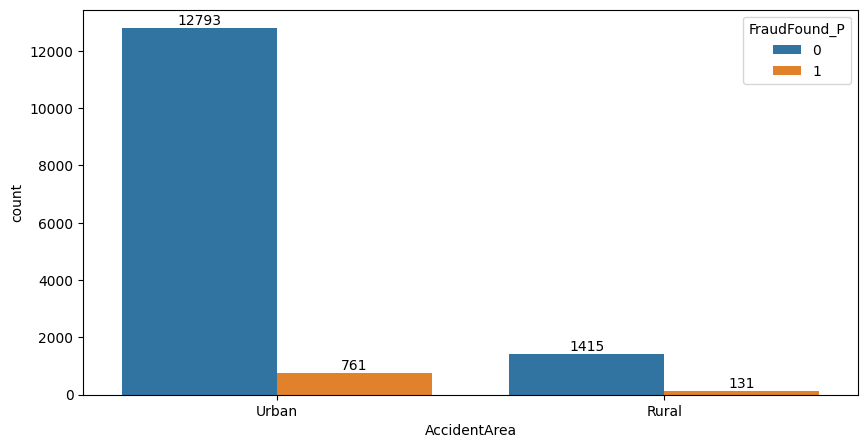

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["AccidentArea"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '877'), Text(0, 0, '15')]

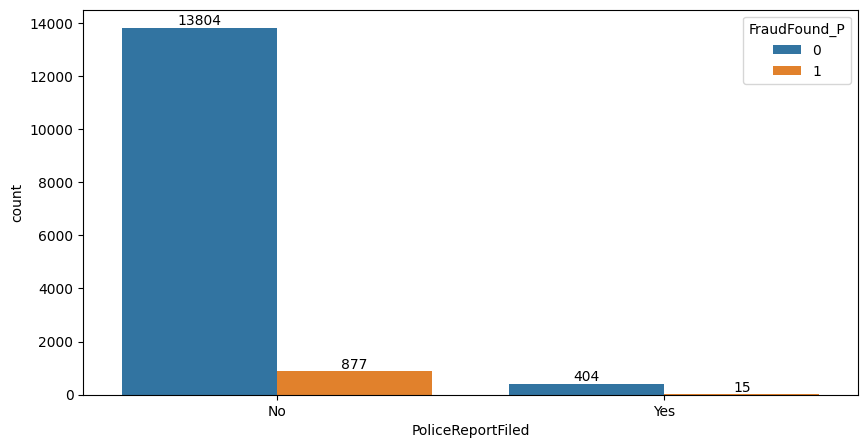

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["PoliceReportFiled"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '888'), Text(0, 0, '4')]

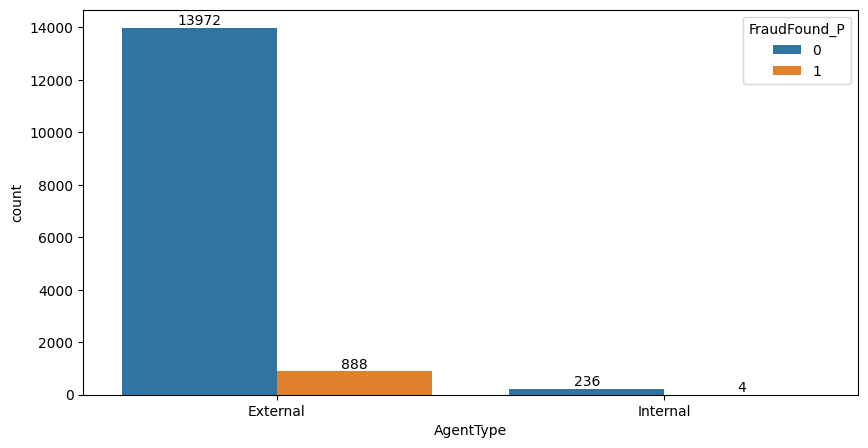

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["AgentType"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '10'),
 Text(0, 0, '798'),
 Text(0, 0, '31'),
 Text(0, 0, '50'),
 Text(0, 0, '3')]

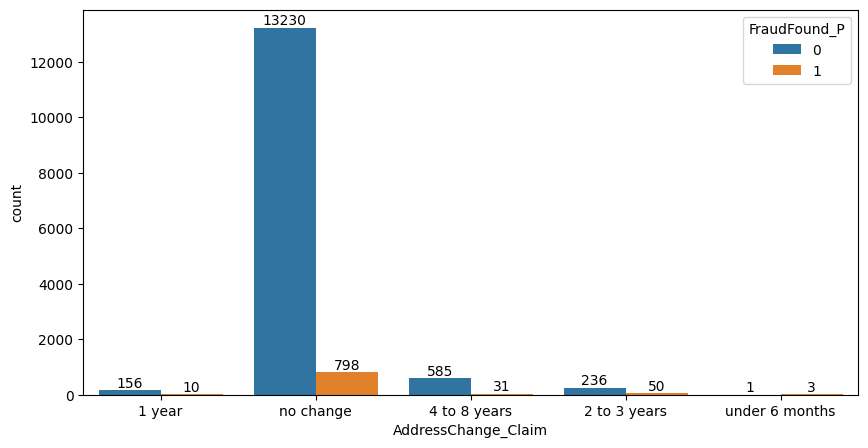

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["AddressChange_Claim"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

[Text(0, 0, '889'), Text(0, 0, '3')]

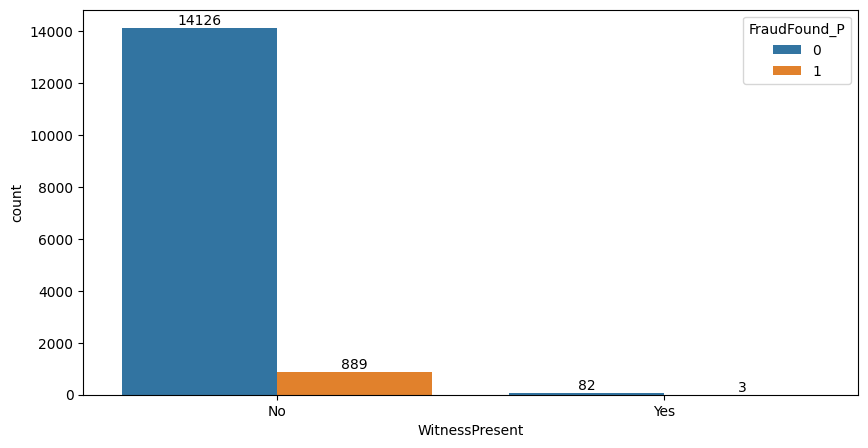

In [ ]:
plt.figure(figsize = (10,5))
rep_plot = sns.countplot(x = df["WitnessPresent"], data = df, hue = 'FraudFound_P')
plt.bar_label(rep_plot.containers[0])
plt.bar_label(rep_plot.containers[1])

## Drop Unnecessary columns

In [ ]:
df.drop(['NumberOfSuppliments','PolicyNumber','RepNumber','DriverRating','WeekOfMonthClaimed','WeekOfMonth','DayOfWeek','Days_Policy_Accident','AddressChange_Claim','NumberOfCars','DayOfWeekClaimed','MonthClaimed','Age','Days_Policy_Claim','NumberOfSuppliments'],axis=1, inplace=True)
df.shape

(15100, 19)

In [ ]:
df.head(5)

,Month,Make,AccidentArea,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,Year,BasePolicy
0,Dec,Honda,Urban,Female,Single,Policy Holder,Sport - Liability,Sport,more than 69000,0,300,none,3 years,26 to 30,No,No,External,1994,Liability
1,Jan,Honda,Urban,Male,Single,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,none,6 years,31 to 35,Yes,No,External,1994,Collision
2,Oct,Honda,Urban,Male,Married,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,1,7 years,41 to 50,No,No,External,1994,Collision
3,Jun,Toyota,Rural,Male,Married,Third Party,Sedan - Liability,Sport,20000 to 29000,0,400,1,more than 7,51 to 65,Yes,No,External,1994,Liability
4,Jan,Honda,Urban,Female,Single,Third Party,Sport - Collision,Sport,more than 69000,0,400,none,5 years,31 to 35,No,No,External,1994,Collision


In [ ]:
#columns we need for training
df.columns

Index(['Month', 'Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault',
       'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P',
       'Deductible', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'Year',
       'BasePolicy'],
      dtype='object')

# Use One hot encoding to convert categorical data into numerical

In [ ]:
def categorical_to_numerical(L):
  new_data=one_hot_encoder(df,'Month')
  for i in L:
    new_data=one_hot_encoder(new_data,i)
  return new_data

In [ ]:
categorical=['Make','AccidentArea',	'Sex',	'MaritalStatus',	'Fault',	'PolicyType',	'VehicleCategory',	'VehiclePrice','PastNumberOfClaims',	'AgeOfVehicle',	'AgeOfPolicyHolder',	'PoliceReportFiled',	'WitnessPresent',	'AgentType',	'Year',	'BasePolicy']
new_data=categorical_to_numerical(categorical)

# Save cleaned data

In [ ]:
file_name = 'cleaned_data.csv'
new_data.to_csv(file_name, sep=',')

# Build Machine Learning Models

* Juhi - Logistic Regression
* Vj- Random Forest
* Ghazal - SVM
* Siyuan - XGBoost, AdaBoost
* Nasim - KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/final_data.csv')

# Split the data into features (X) and labels (y)
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5

knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

F1-score: 0.0
Accuracy: 0.938941214680091


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score




# Split the data into features (X) and labels (y)
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Define the scoring metric as F1-score
scorer = make_scorer(f1_score, average='weighted')

# Perform cross-validation
f1_scores = cross_val_score(knn, X, y, cv=5, scoring=scorer)


# Print the cross-validation scores
print("Cross-Validation Scores:", f1_scores)
print("Mean F1-score:", f1_scores.mean())

Cross-Validation Scores: [0.01057026 0.55026591 0.53118345 0.57049693 0.91172949]
Mean F1-score: 0.5148492092974201


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

df = pd.read_csv('/content/final_data.csv')

# Split the data into features (X) and labels (y)
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)


# Perform cross-validation
accuracy_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", accuracy_scores)
print("Mean Accuracy:", accuracy_scores.mean())


Cross-Validation Scores: [0.06138357 0.42365172 0.40220923 0.44346979 0.94054581]
Mean Accuracy: 0.4542520218605527


## Predict model demo

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('final_data.csv')

In [ ]:
column_headers = list(df.columns)

In [ ]:
df_ip = pd.DataFrame(columns=column_headers, index=[0])

In [ ]:
df_ip

,Unnamed: 0,FraudFound_P,Deductible,Apr,Aug,Dec,Feb,Jan,Jul,Jun,...,No.1,Yes.1,External,Internal,1994,1995,1996,All Perils,Collision,Liability
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2 = df_ip.fillna(0)

In [ ]:
df2

,Unnamed: 0,FraudFound_P,Deductible,Apr,Aug,Dec,Feb,Jan,Jul,Jun,...,No.1,Yes.1,External,Internal,1994,1995,1996,All Perils,Collision,Liability
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sexList = ['Male', 'Female']
maritalStatusList = ['Single', 'Married', 'Divorced', 'Widowed']
AgentTypeList = ['Internal', 'External']
BasePolicyList = ['Collision', 'Liability', 'All Perils']
DeductibleList = [300, 400, 500, 700];
PastNumberOfClaimsList = ['None', '1', '2 to 4', 'More than 4'];
AgeOfPolicyHolderList = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'Over 65'];
FaultList = ['Policy Holder', 'Third Party']
AccidentAreaList = ['Urban', 'Rural']
VehicleCategoryList = ['Sedan', 'Sport', 'Utility']
VehicleMakeList = ['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'];
VehiclePriceList = ['Less than $20,000', '$20,000 to $29,000', '$30,000 to $39,000', '$40,000 to $59,000', '$60,000 to $69,000', 'More than $69,000']
AgeOfVehicleList = ['New', '2 Years', '3 Years', '4 Years', '5 Years', '6 Years', '7 Years', 'More than 7 Years']



In [ ]:

df = df.rename(columns={'Widow': 'Widowed'})
df = df.rename(columns={'more than 4': 'More than 4'})
df = df.rename(columns={'over 65': 'Over 65'})
df = df.rename(columns={'none': 'None'})
df = df.rename(columns={'less than 20000': 'Less than $20,000'})
df = df.rename(columns={'20000 to 29000': '$20,000 to $29,000'})
df = df.rename(columns={'30000 to 39000': '$30,000 to $39,000'})
df = df.rename(columns={'40000 to 59000': '$40,000 to $59,000'})
df = df.rename(columns={'60000 to 69000': '$60,000 to $69,000'})
df = df.rename(columns={'more than 69000': 'More than $69,000'})
df = df.rename(columns={'new': 'New'})
df = df.rename(columns={'2 years': '2 Years'})
df = df.rename(columns={'3 years': '3 Years'})
df = df.rename(columns={'4 years': '4 Years'})
df = df.rename(columns={'5 years': '5 Years'})
df = df.rename(columns={'6 years': '6 Years'})
df = df.rename(columns={'7 years': '7 Years'})
df = df.rename(columns={'more than 7': 'More than 7 Years'})


In [ ]:
df2['Dec'].iloc[0]

0

In [ ]:
usr_ip = ['Dec','Honda','Rural','Female','Divorced','Policy Holder','Sedan - All Perils','Sedan','20000 to 29000','1','none','16 to 17','No','Yes','Internal','1995','Collision']

In [ ]:
for ip in usr_ip:
  df2[ip].iloc[0] = 1

In [ ]:
df2['Urban'].iloc[0]

0

In [ ]:
df2['Deductible'].iloc[0] = 300

In [ ]:
df2.drop('FraudFound_P', axis = 1, inplace = True)

In [ ]:
y_pred = knn.predict(df2)

In [ ]:
y_pred

array([0])

# Predict with new data

In [ ]:
import pickle
def read_model(path):
  loaded_model = pickle.load(open(path, "rb"))
  return loaded_model

loaded_model=read_model("/content/xg_model.pickle")

In [ ]:
import pandas as pd

def empty_df(path):
  df = pd.read_csv(path)
  df.drop('FraudFound_P', axis = 1, inplace = True)
  df.drop('Unnamed: 0', axis = 1, inplace = True)
  column_headers = list(df.columns)
  df_ip = pd.DataFrame(columns=column_headers, index=[0])
  return df_ip.fillna(0)

def predict(model,df2):
  y_pred = model.predict(df2)
  if y_pred[0]== 0:
    print("Is not fraud")
  else:
    print("Is fraud")


In [ ]:
predict(loaded_model,user)

Is fraud


# user information

In [ ]:
import pandas as pd
new_df=pd.read_csv("/content/final_data.csv")
test_data=new_df[new_df['FraudFound_P']==1]

In [ ]:
new_df=pd.read_csv("/content/final_data.csv")
test_data=new_df[new_df['FraudFound_P']==1]
test_data.head()

,Unnamed: 0,FraudFound_P,Deductible,Apr,Aug,Dec,Feb,Jan,Jul,Jun,...,No.1,Yes.1,External,Internal,1994,1995,1996,All Perils,Collision,Liability
28,28,1,400,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
52,52,1,400,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
53,53,1,400,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
94,94,1,400,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
96,96,1,400,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0


In [ ]:
test_data.drop("FraudFound_P",axis=1,inplace=True)
test_data.drop("Unnamed: 0",axis=1,inplace=True)
test_data.head(15)

<ipython-input-10-9edf1a88c2b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop("FraudFound_P",axis=1,inplace=True)
<ipython-input-10-9edf1a88c2b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop("Unnamed: 0",axis=1,inplace=True)


,Deductible,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,...,No.1,Yes.1,External,Internal,1994,1995,1996,All Perils,Collision,Liability
28,400,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
52,400,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
53,400,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
94,400,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
96,400,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
100,400,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
113,400,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
118,400,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
119,400,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
147,400,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0


In [ ]:
from pandas import DataFrame
user=DataFrame(test_data.iloc[14]).T

In [ ]:
user

,Deductible,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,...,No.1,Yes.1,External,Internal,1994,1995,1996,All Perils,Collision,Liability
204,500,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0


#SVM

## Split Data manually

In [ ]:
import pandas as pd
df = pd.read_csv("/content/final_data.csv")

In [ ]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [ ]:
df.head(5)

,FraudFound_P,Deductible,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,No.1,Yes.1,External,Internal,1994,1995,1996,All Perils,Collision,Liability
0,0,300,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,0,400,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
2,0,400,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
3,0,400,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
4,0,400,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0


In [ ]:
df['FraudFound_P'].value_counts()

0    14476
1      915
Name: FraudFound_P, dtype: int64

In [ ]:
x_1=df[df['FraudFound_P']==1]
x_0=df[df['FraudFound_P']==0]

split_1=int(x_1.shape[0]*0.8)
split_0=int(x_0.shape[0]*0.8)

X_1=x_1.iloc[0:split_1]
print(X_1.shape)
X_0=x_0.iloc[0:split_0]
print(X_0.shape)

data = [X_0, X_1]
X_train = pd.concat(data)
X_train.drop("FraudFound_P",axis=1, inplace=True)
X_train.shape

(732, 94)
(11580, 94)


(12312, 93)

In [ ]:
X_train.head(5)

,Deductible,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,...,No.1,Yes.1,External,Internal,1994,1995,1996,All Perils,Collision,Liability
0,300,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,400,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
2,400,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
3,400,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
4,400,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0


In [ ]:
x_1=df[df['FraudFound_P']==1]
x_0=df[df['FraudFound_P']==0]

X_1=x_1.iloc[split_1:]
print(X_1.shape)
X_0=x_0.iloc[split_0:]
print(X_0.shape)

data = [X_0, X_1]
X_test = pd.concat(data)
X_test.drop("FraudFound_P",axis=1, inplace=True)
X_test.shape

(183, 94)
(2896, 94)


(3079, 93)

In [ ]:
y_1=df['FraudFound_P'][df['FraudFound_P']==1]
y_0=df['FraudFound_P'][df['FraudFound_P']==0]

Y_1=y_1.iloc[0:split_1]
Y_0=y_0.iloc[0:split_0]

data = [Y_0, Y_1]
y_train = pd.concat(data)
y_train.shape


(12312,)

In [ ]:
y_1=df['FraudFound_P'][df['FraudFound_P']==1]
y_0=df['FraudFound_P'][df['FraudFound_P']==0]

Y_1=y_1.iloc[split_1:]
Y_0=y_0.iloc[split_0:]

data = [Y_0, Y_1]
y_test = pd.concat(data)
y_test.shape


(3079,)

## SVM Model training

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [ ]:
# Use sklearn split
# y = df['FraudFound_P']
# X = df.drop("FraudFound_P",axis = 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48,stratify = y)

In [ ]:
# clf = make_pipeline(StandardScaler(), SVC( kernel='rbf',gamma='auto',probability=True, random_state=49))
clf = SVC( kernel='rbf',gamma='auto',class_weight='balanced',probability=True, random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_train_pred=clf.predict(X_train)

In [ ]:
#test accuracy
accuracy_score(y_test, y_pred)

0.9165313413445924

In [ ]:
#training accuracy
accuracy_score(y_train_pred, y_train)

0.633853151397011

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2896
           1       0.08      0.04      0.05       183

    accuracy                           0.92      3079
   macro avg       0.51      0.51      0.50      3079
weighted avg       0.89      0.92      0.90      3079



#show confusion matrix

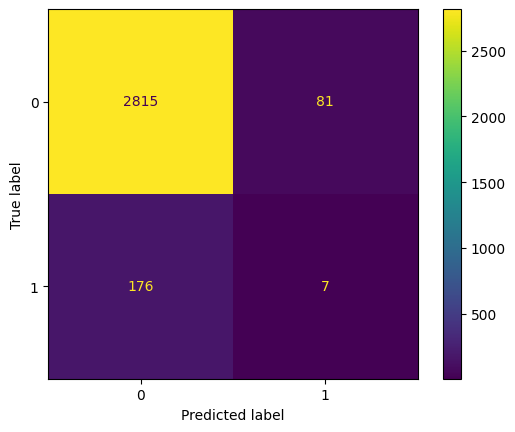

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

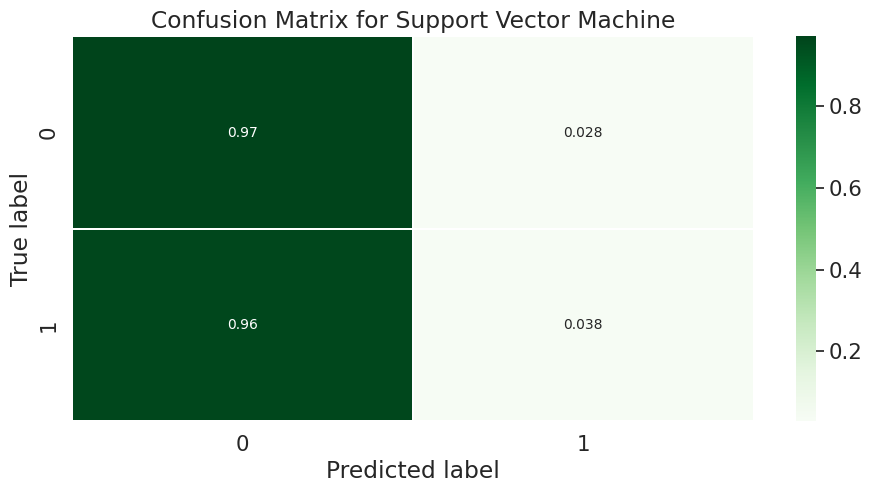

In [ ]:
import seaborn as sns
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(11,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

In [ ]:
4from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.48468619246861927

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_pred, y_train, average='macro')

0.4860656084537648

#Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [ ]:
df_rf = pd.read_csv("/content/final_data.csv")

# Split the data into features (X) and target (y)
X = df_rf.drop('FraudFound_P', axis=1)
y = df_rf['FraudFound_P']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
y_train.value_counts()

0    10130
1      643
Name: FraudFound_P, dtype: int64

In [ ]:
#Random forest classifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions for the test set
y_pred = rf.predict(X_test)

In [ ]:
#Calculation of accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9415331312256388


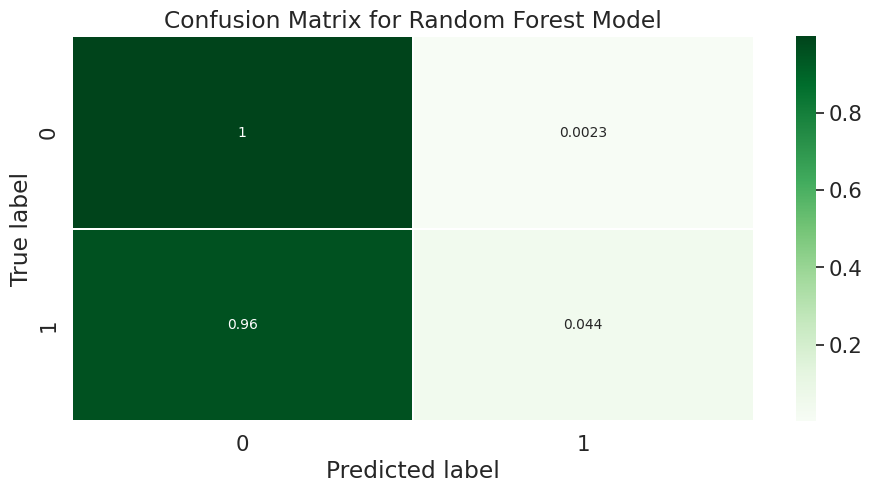

In [ ]:
#Plotting confusion matrix

matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(11,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4346
           1       0.55      0.04      0.08       272

    accuracy                           0.94      4618
   macro avg       0.74      0.52      0.53      4618
weighted avg       0.92      0.94      0.92      4618



# *XGBoost*

In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/final_data.csv")

In [ ]:
df.head()

,Unnamed: 0,FraudFound_P,Deductible,Apr,Aug,Dec,Feb,Jan,Jul,Jun,...,No.1,Yes.1,External,Internal,1994,1995,1996,All Perils,Collision,Liability
0,0,0,300,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,1,0,400,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
2,2,0,400,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
3,3,0,400,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
4,4,0,400,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, accuracy_score


In [ ]:
y = df['FraudFound_P']
X = df.drop("FraudFound_P",axis = 1)
X = X.drop("Unnamed: 0" ,axis = 1)

X.head()

,Deductible,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,...,No.1,Yes.1,External,Internal,1994,1995,1996,All Perils,Collision,Liability
0,300,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,400,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
2,400,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
3,400,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
4,400,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 48,stratify = y)

In [ ]:
Y_train.value_counts()

0    11580
1      732
Name: FraudFound_P, dtype: int64

In [ ]:
from xgboost import XGBClassifier
print('XGBoost classifier')

#model_xgb = XGBClassifier(max_depth = 16, min_child_weight = 3, gamma =  7)
model_xgb = XGBClassifier(max_depth = 7, min_child_weight = 1, gamma =  0.21, n_estimators = 128)
model_xgb.fit(X_train,Y_train)

X_train_prediction = model_xgb.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('The training set accuracy is: ',train_data_accuracy)

X_test_prediction = model_xgb.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test )
print('The test set accuracy is: ',test_data_accuracy)

prediction_xgb = model_xgb.predict(X)
accuracy_xgb = accuracy_score(prediction_xgb, y)
print('The whole dataset accuracy is: ',accuracy_xgb)

XGBoost classifier
The training set accuracy is:  0.9758771929824561
The test set accuracy is:  0.9356934069503086
The whole dataset accuracy is:  0.9678383470859593


In [ ]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2896
           1       0.36      0.11      0.17       183

    accuracy                           0.94      3079
   macro avg       0.65      0.55      0.57      3079
weighted avg       0.91      0.94      0.92      3079



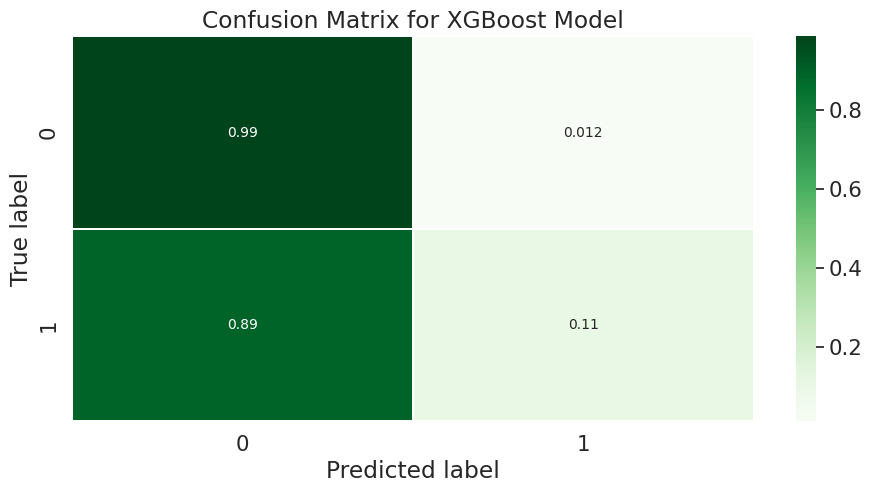

In [ ]:
matrix = confusion_matrix(Y_test, X_test_prediction)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(11,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

In [ ]:
import pickle
filename = "xg_model.pickle"
pickle.dump(model_xgb, open(filename, "wb"))
loaded_model = pickle.load(open(filename, "rb"))


#AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
print('Adaboost classifier')

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model_abc = abc.fit(X_train, Y_train)

X_train_prediction1 = model_abc.predict(X_train)
train_data_accuracy1 = accuracy_score(X_train_prediction1, Y_train)
print('The training set accuracy is: ',train_data_accuracy1)

X_test_prediction1 = model_abc.predict(X_test)
test_data_accuracy1 = accuracy_score(X_test_prediction1, Y_test)
print('The test set accuracy is: ',test_data_accuracy1)

prediction_abc = model_abc.predict(X)
accuracy_abc = accuracy_score(prediction_abc, y)
print('The whole dataset accuracy is: ',accuracy_abc)

Adaboost classifier
The training set accuracy is:  0.9361598440545809
The test set accuracy is:  0.935043845404352
The whole dataset accuracy is:  0.9359365863166785


In [ ]:
print(classification_report(Y_test, X_test_prediction1))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2896
           1       0.13      0.02      0.03       183

    accuracy                           0.94      3079
   macro avg       0.54      0.50      0.50      3079
weighted avg       0.89      0.94      0.91      3079



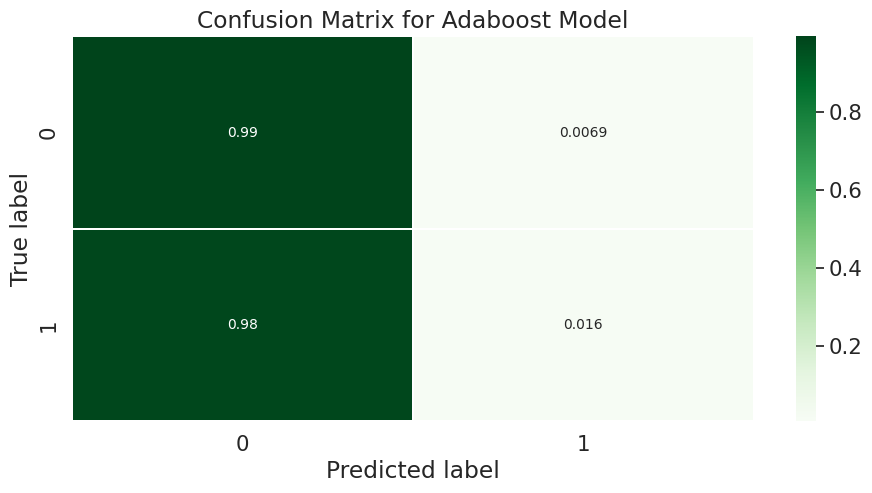

In [ ]:
matrix = confusion_matrix(Y_test, X_test_prediction1)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(11,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Adaboost Model')
plt.show()

## Cross Validation for XGBoost

In [ ]:
from xgboost import cv
import xgboost as xgb

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 16, 'alpha': 10}
data_dmatrix = xgb.DMatrix(data=X,label=y)
xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.637071,0.002731,0.636727,0.011309
1,0.714123,0.057319,0.711604,0.060280
2,0.781845,0.015644,0.782248,0.006701
3,0.783343,0.013812,0.783669,0.006211
4,0.792336,0.011352,0.792526,0.012447
5,0.803538,0.006514,0.800823,0.011292
6,0.802807,0.006251,0.799999,0.011477
7,0.804541,0.007584,0.801270,0.010797
8,0.803827,0.007431,0.800171,0.011465
9,0.804231,0.008180,0.800585,0.011173


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_xgb, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.91588178 0.9265757  0.91455491 0.93112411 0.93469786]
Mean accuracy: 0.924566869280065


In [ ]:
cv_scores = cross_val_score(model_xgb, X, y, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-validation F1 scores:", cv_scores)
print("Mean F1 score:", cv_scores.mean())

Cross-validation F1 scores: [0.07168459 0.08130081 0.0899654  0.0619469  0.04739336]
Mean F1 score: 0.07045821326588056


## Hyperparamter tuning for XGBoost


In [ ]:
# For Hyperparameter tunning of Xgboost
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
# Let's Create  a dictionary with random Parameters for all XGBoostClassifier parameters
space={
    'objective': 'binary:logistic',
    'use_label_encoder': False,
    'base_score': 0.5,
    'booster': 'gbtree',
    'colsample_bylevel' : 1,
    'colsample_bynode' : 1,
    'colsample_bytree' : 1,
    'enable_categorical': False,
    'gamma': hp.uniform('gamma', 0,10),
    'gpu_id': -1,
    'importance_type': None,
    'interaction_constraints': '',
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': hp.randint("max_depth", 10)+3,
    'min_child_weight' : hp.randint('min_child_weight', 4)+1,
    'monotone_constraints': '()',
    'n_estimators': hp.randint('n_estimators', 150)+50,
    'n_jobs': -1,
    'num_parallel_tree':1,
    'predictor':'auto',
    'random_state': 0,
    'reg_alpha' : hp.randint('reg_alpha', 10),
    'reg_lambda' : hp.randint('reg_lambda', 10),
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': 'exact',
    'validate_parameters':1,
    'verbosity': None}

In [ ]:
# Define a function for our Space Dictionary and train our model
def objective(space):
    clf_model= XGBClassifier(**space)

    evaluation = [( X_train, Y_train), ( X_test, Y_test)]

    clf_model.fit(X_train, Y_train, eval_set = evaluation, eval_metric="auc", early_stopping_rounds=10,verbose=False)

    pred = clf_model.predict(X_test)
    accuracy = accuracy_score(Y_test, pred>0.5)

    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
  1%|          | 1/100 [00:03<06:11,  3.75s/trial, best loss: -0.9405651185449821]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
  2%|▏         | 2/100 [00:05<04:35,  2.81s/trial, best loss: -0.9405651185449821]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
  3%|▎         | 3/100 [00:06<02:55,  1.81s/trial, best loss: -0.9405651185449821]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
  4%|▍         | 4/100 [00:09<03:36,  2.26s/trial, best loss: -0.9405651185449821]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9428385839558299
  5%|▌         | 5/100 [00:11<03:40,  2.32s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
  6%|▌         | 6/100 [00:13<03:04,  1.97s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
  7%|▋         | 7/100 [00:14<02:47,  1.81s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
  8%|▊         | 8/100 [00:15<02:32,  1.65s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
  9%|▉         | 9/100 [00:17<02:34,  1.69s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 10%|█         | 10/100 [00:18<02:03,  1.37s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 11%|█         | 11/100 [00:22<03:07,  2.10s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 12%|█▏        | 12/100 [00:24<03:01,  2.06s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 13%|█▎        | 13/100 [00:25<02:43,  1.88s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 14%|█▍        | 14/100 [00:27<02:32,  1.77s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 15%|█▌        | 15/100 [00:28<02:15,  1.60s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 16%|█▌        | 16/100 [00:28<01:50,  1.32s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 17%|█▋        | 17/100 [00:30<01:55,  1.40s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9421890224098733
 18%|█▊        | 18/100 [00:34<02:56,  2.15s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 19%|█▉        | 19/100 [00:35<02:36,  1.93s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 20%|██        | 20/100 [00:37<02:27,  1.84s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9408898993179604
 21%|██        | 21/100 [00:38<02:09,  1.63s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9428385839558299
 22%|██▏       | 22/100 [00:40<02:04,  1.60s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9428385839558299
 23%|██▎       | 23/100 [00:41<02:00,  1.57s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 24%|██▍       | 24/100 [00:42<01:50,  1.46s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9428385839558299
 25%|██▌       | 25/100 [00:45<02:15,  1.80s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 26%|██▌       | 26/100 [00:47<02:16,  1.85s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 27%|██▋       | 27/100 [00:48<01:58,  1.62s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 28%|██▊       | 28/100 [00:49<01:47,  1.49s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9408898993179604
 29%|██▉       | 29/100 [00:50<01:33,  1.32s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 30%|███       | 30/100 [00:51<01:31,  1.30s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 31%|███       | 31/100 [00:53<01:39,  1.45s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 32%|███▏      | 32/100 [00:54<01:26,  1.28s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9421890224098733
 33%|███▎      | 33/100 [00:58<02:16,  2.03s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 34%|███▍      | 34/100 [01:01<02:29,  2.27s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9428385839558299
 35%|███▌      | 35/100 [01:03<02:20,  2.15s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 36%|███▌      | 36/100 [01:04<02:05,  1.97s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 37%|███▋      | 37/100 [01:06<02:06,  2.01s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 38%|███▊      | 38/100 [01:09<02:25,  2.35s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 39%|███▉      | 39/100 [01:11<02:11,  2.16s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9428385839558299
 40%|████      | 40/100 [01:13<02:10,  2.17s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 41%|████      | 41/100 [01:14<01:49,  1.86s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 42%|████▏     | 42/100 [01:15<01:34,  1.62s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 43%|████▎     | 43/100 [01:17<01:39,  1.74s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9408898993179604
 44%|████▍     | 44/100 [01:18<01:19,  1.43s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 45%|████▌     | 45/100 [01:21<01:44,  1.90s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9408898993179604
 46%|████▌     | 46/100 [01:24<01:54,  2.12s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9418642416368951
 47%|████▋     | 47/100 [01:25<01:42,  1.94s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 48%|████▊     | 48/100 [01:27<01:36,  1.85s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 49%|████▉     | 49/100 [01:28<01:24,  1.66s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 50%|█████     | 50/100 [01:30<01:20,  1.62s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9428385839558299
 51%|█████     | 51/100 [01:33<01:41,  2.08s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 52%|█████▏    | 52/100 [01:34<01:32,  1.94s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9428385839558299
 53%|█████▎    | 53/100 [01:36<01:27,  1.85s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 54%|█████▍    | 54/100 [01:38<01:26,  1.87s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 55%|█████▌    | 55/100 [01:40<01:24,  1.87s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 56%|█████▌    | 56/100 [01:41<01:18,  1.78s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 57%|█████▋    | 57/100 [01:45<01:38,  2.29s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 58%|█████▊    | 58/100 [01:46<01:17,  1.83s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 59%|█████▉    | 59/100 [01:47<01:12,  1.77s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 60%|██████    | 60/100 [01:49<01:10,  1.77s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 61%|██████    | 61/100 [01:50<01:02,  1.61s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 62%|██████▏   | 62/100 [01:52<01:03,  1.68s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 63%|██████▎   | 63/100 [01:54<00:58,  1.57s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9418642416368951
 64%|██████▍   | 64/100 [01:56<01:03,  1.75s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 65%|██████▌   | 65/100 [01:57<00:54,  1.56s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9418642416368951
 66%|██████▌   | 66/100 [01:59<01:00,  1.79s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9415394608639168
 67%|██████▋   | 67/100 [02:02<01:13,  2.22s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 68%|██████▊   | 68/100 [02:06<01:24,  2.65s/trial, best loss: -0.9428385839558299]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.943163364728808
 69%|██████▉   | 69/100 [02:08<01:13,  2.38s/trial, best loss: -0.943163364728808] 

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 70%|███████   | 70/100 [02:09<01:00,  2.01s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9412146800909387
 71%|███████   | 71/100 [02:11<01:01,  2.14s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9421890224098733
 72%|███████▏  | 72/100 [02:13<00:56,  2.02s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 73%|███████▎  | 73/100 [02:16<01:00,  2.24s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 74%|███████▍  | 74/100 [02:17<00:47,  1.82s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 75%|███████▌  | 75/100 [02:19<00:51,  2.05s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.943163364728808
 76%|███████▌  | 76/100 [02:21<00:45,  1.91s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9428385839558299
 77%|███████▋  | 77/100 [02:22<00:41,  1.79s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9412146800909387
 78%|███████▊  | 78/100 [02:24<00:38,  1.75s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 79%|███████▉  | 79/100 [02:25<00:34,  1.62s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 80%|████████  | 80/100 [02:27<00:32,  1.64s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 81%|████████  | 81/100 [02:28<00:27,  1.46s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 82%|████████▏ | 82/100 [02:31<00:32,  1.81s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9421890224098733
 83%|████████▎ | 83/100 [02:32<00:27,  1.62s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 84%|████████▍ | 84/100 [02:35<00:31,  1.99s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9428385839558299
 85%|████████▌ | 85/100 [02:36<00:26,  1.80s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 86%|████████▌ | 86/100 [02:37<00:22,  1.63s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 87%|████████▋ | 87/100 [02:39<00:21,  1.68s/trial, best loss: -0.943163364728808]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9434881455017863
 88%|████████▊ | 88/100 [02:43<00:27,  2.31s/trial, best loss: -0.9434881455017863]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 89%|████████▉ | 89/100 [02:45<00:26,  2.38s/trial, best loss: -0.9434881455017863]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9425138031828516
 90%|█████████ | 90/100 [02:48<00:24,  2.42s/trial, best loss: -0.9434881455017863]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 91%|█████████ | 91/100 [02:50<00:20,  2.23s/trial, best loss: -0.9434881455017863]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9421890224098733
 92%|█████████▏| 92/100 [02:52<00:17,  2.25s/trial, best loss: -0.9434881455017863]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9418642416368951
 93%|█████████▎| 93/100 [02:56<00:19,  2.76s/trial, best loss: -0.9434881455017863]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9405651185449821
 94%|█████████▍| 94/100 [02:58<00:15,  2.52s/trial, best loss: -0.9434881455017863]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9434881455017863
 95%|█████████▌| 95/100 [03:00<00:11,  2.25s/trial, best loss: -0.9434881455017863]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.943163364728808
 96%|█████████▌| 96/100 [03:01<00:08,  2.04s/trial, best loss: -0.9434881455017863]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.943163364728808
 97%|█████████▋| 97/100 [03:03<00:05,  1.91s/trial, best loss: -0.9434881455017863]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9428385839558299
 98%|█████████▊| 98/100 [03:04<00:03,  1.82s/trial, best loss: -0.9434881455017863]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9418642416368951
 99%|█████████▉| 99/100 [03:07<00:02,  2.12s/trial, best loss: -0.9434881455017863]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.9428385839558299
100%|██████████| 100/100 [03:09<00:00,  1.89s/trial, best loss: -0.9434881455017863]


In [ ]:
best_hyperparams

{'gamma': 1.1442993286578655,
 'max_depth': 5,
 'min_child_weight': 0,
 'n_estimators': 89,
 'reg_alpha': 1,
 'reg_lambda': 3}

In [ ]:
# The optimized model with best hyperparameters of XGboost Classifier
clf_model_optimizied = XGBClassifier(
    objective= 'binary:logistic',
    use_label_encoder= False,
    base_score= 0.5,
    booster= 'gbtree',
    colsample_bylevel= 1,
    colsample_bynode= 1,
    colsample_bytree= 1,
    enable_categorical= False,
    gamma= best_hyperparams['gamma'],
    gpu_id= -1,
    importance_type= None,
    interaction_constraints= '',
    learning_rate= 0.300000012,
    max_delta_step= 0,
    max_depth= best_hyperparams['max_depth'],
    min_child_weight= best_hyperparams['min_child_weight'],
    monotone_constraints= '()',
    n_estimators= best_hyperparams['n_estimators'],
    n_jobs= 4,
    num_parallel_tree= 1,
    predictor= 'auto',
    random_state= 0,
    reg_alpha= best_hyperparams['reg_alpha'],
    reg_lambda= best_hyperparams['reg_lambda'],
    scale_pos_weight= 1,
    subsample= 1,
    tree_method= 'exact',
    validate_parameters= 1,
    verbosity= None,
    eval_metric= 'aucpr'
)
print(clf_model_optimizied.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'aucpr', 'feature_types': None, 'gamma': 1.1442993286578655, 'gpu_id': -1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': 0, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': 0, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 89, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 1, 'reg_lambda': 3, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
# Fit the optimized model
xgb_model = clf_model_optimizied.fit(X_train, Y_train)

In [ ]:
X_train_prediction2 = xgb_model.predict(X_train)
train_data_accuracy2 = accuracy_score(X_train_prediction1, Y_train)
print('The training set accuracy is: ',train_data_accuracy2)

X_test_prediction2 = xgb_model.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction1, Y_test)
print('The test set accuracy is: ',test_data_accuracy2)

prediction_xgb_model = xgb_model.predict(X)
accuracy_xgb_model = accuracy_score(prediction_xgb_model, y)
print('The whole dataset accuracy is: ',accuracy_xgb_model)

The training set accuracy is:  0.9361598440545809
The test set accuracy is:  0.935043845404352
The whole dataset accuracy is:  0.9443181079851861


In [ ]:
print(classification_report(Y_test, X_test_prediction2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2896
           1       0.90      0.05      0.09       183

    accuracy                           0.94      3079
   macro avg       0.92      0.52      0.53      3079
weighted avg       0.94      0.94      0.92      3079



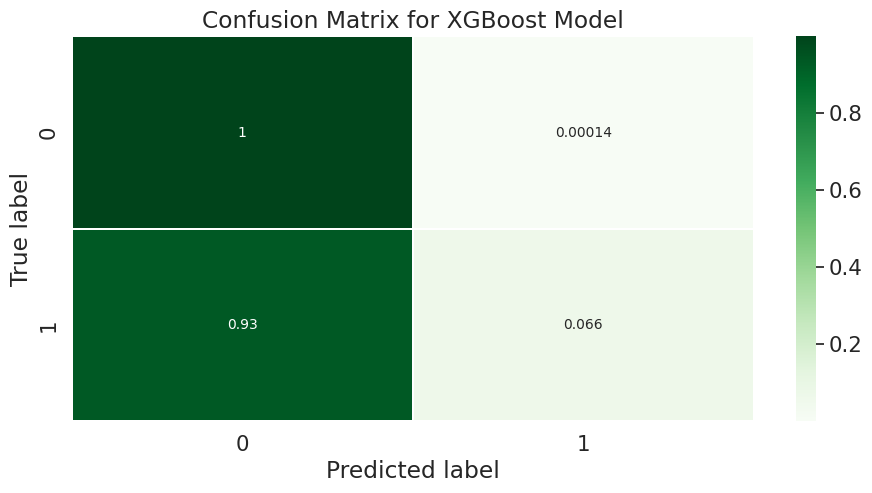

In [ ]:
matrix = confusion_matrix(y, prediction_xgb_model)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(11,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()